In [1]:
## Inputs: 
## - mapping -- 10x20 mat where each cell value reps the control value/index
## - mask    -- 10x20 mat where 5x5 block of ones indicate the control/actuation focus
## - control -- 5x5 mat to be applied to mask focus


## Output:
## - control_dict -- dict with keys(1-30) of control

Control


array([[5, 8, 9, 5, 0],
       [0, 1, 7, 6, 9],
       [2, 4, 5, 2, 4],
       [2, 4, 7, 7, 9],
       [1, 7, 0, 6, 9]])

Mapping


array([[ 5, 10, 15, 20, 25, 30,  5, 10, 15, 20, 25, 30],
       [ 4,  9, 14, 19, 24, 29,  4,  9, 14, 19, 24, 29],
       [ 3,  8, 13, 18, 23, 28,  3,  8, 13, 18, 23, 28],
       [ 2,  7, 12, 17, 22, 27,  2,  7, 12, 17, 22, 27],
       [ 1,  6, 11, 16, 21, 26,  1,  6, 11, 16, 21, 26],
       [ 5, 10, 15, 20, 25, 30,  5, 10, 15, 20, 25, 30],
       [ 4,  9, 14, 19, 24, 29,  4,  9, 14, 19, 24, 29],
       [ 3,  8, 13, 18, 23, 28,  3,  8, 13, 18, 23, 28],
       [ 2,  7, 12, 17, 22, 27,  2,  7, 12, 17, 22, 27],
       [ 1,  6, 11, 16, 21, 26,  1,  6, 11, 16, 21, 26]], dtype=int8)

Mask


array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

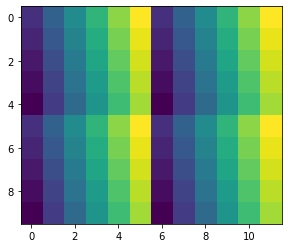

In [18]:
import numpy as np
from math import floor, ceil



## control
np.random.seed(1)
control = np.random.randint(0, 10, (5,5))
print("Control")
display(control)

## mapping
fixed_size = (10,12)
n_rows, n_cols = fixed_size
mapping = np.zeros(fixed_size, dtype=np.int8)
submap = np.zeros((int(n_rows/2), int(n_cols/2)))

submap[:, 0] = np.arange(5, 0, -1)#.reshape((n_rows/2, 1))
submap[:, 1] = np.arange(10, 5, -1)#.reshape((n_rows/2, 1))
submap[:, 2] = np.arange(15, 10, -1)#.reshape((n_rows/2, 1))
submap[:, 3] = np.arange(20, 15, -1)#.reshape((n_rows/2, 1))
submap[:, 4] = np.arange(25, 20, -1)#.reshape((n_rows/2, 1))
submap[:, 5] = np.arange(30, 25, -1)#.reshape((n_rows/2, 1))

mapping[0:5, 0:6] = submap
mapping[0:5, 6:12] = submap
mapping[5:10, 0:6] = submap
mapping[5:10, 6:12] = submap
print("Mapping")
display(mapping)

plt.imshow(mapping, interpolation='nearest')

## mask
centroid = (3,2)
mask_width = 5
n_cols, n_rows = 12, 10
fixed_size = (n_rows, n_cols)

def maskFromCentroid(centroid):
    x, y = centroid
    
    x_min = max(0, x - floor(mask_width/2))
    x_max = min(n_cols, x + ceil(mask_width/2))
    
    y_min = max(0, y - floor(mask_width/2))
    y_max = min(n_rows, y + ceil(mask_width/2))
    
    mask = np.zeros((fixed_size))
    mask[y_min:y_max, x_min:x_max] = 1
    
    return mask
mask = maskFromCentroid(centroid)
print("Mask")
display(mask)

In [33]:
control_mask = np.zeros((10,12), dtype=int)
control_mask[mask.nonzero()] = control.flatten()
print("control_mask: ")
print(control_mask)
print()

mapping[mask==0] = 0
print("mapping: ")
print(mapping)
print()

control_idxs = mapping[mask>0]
print("control_idxs")
print(control_idxs)
print(" ")

control_vals = control_mask[mask>0]
print("control_vals: ")
print(control_vals)
print()

control_dict = {}
for i,v in enumerate(control_idxs):
    control_dict[v] = control_vals[i]
    print(i, v, control_vals[i])
    
print()
print()
print("control dictionary")
# print(control_dict)
display(control_dict)
print()
print()


control_mask: 
[[0 5 8 9 5 0 0 0 0 0 0 0]
 [0 0 1 7 6 9 0 0 0 0 0 0]
 [0 2 4 5 2 4 0 0 0 0 0 0]
 [0 2 4 7 7 9 0 0 0 0 0 0]
 [0 1 7 0 6 9 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

mapping: 
[[ 0 10 15 20 25 30  0  0  0  0  0  0]
 [ 0  9 14 19 24 29  0  0  0  0  0  0]
 [ 0  8 13 18 23 28  0  0  0  0  0  0]
 [ 0  7 12 17 22 27  0  0  0  0  0  0]
 [ 0  6 11 16 21 26  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]

control_idxs
[10 15 20 25 30  9 14 19 24 29  8 13 18 23 28  7 12 17 22 27  6 11 16 21
 26]
 
control_vals: 
[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9]

0 10 5
1 15 8
2 20 9
3 25 5
4 30 0
5 9 0
6 14 1
7 19 7
8 24 6
9 29 9
10 8 2
11 13 4
12 18 5
13 23 2
14 28 4
15 7 2
16 12 4
17 17 7
18 22 7
19 27 9
20 

{10: 5,
 15: 8,
 20: 9,
 25: 5,
 30: 0,
 9: 0,
 14: 1,
 19: 7,
 24: 6,
 29: 9,
 8: 2,
 13: 4,
 18: 5,
 23: 2,
 28: 4,
 7: 2,
 12: 4,
 17: 7,
 22: 7,
 27: 9,
 6: 1,
 11: 7,
 16: 0,
 21: 6,
 26: 9}

In [20]:
control_mask

array([[0, 5, 8, 9, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 7, 6, 9, 0, 0, 0, 0, 0, 0],
       [0, 2, 4, 5, 2, 4, 0, 0, 0, 0, 0, 0],
       [0, 2, 4, 7, 7, 9, 0, 0, 0, 0, 0, 0],
       [0, 1, 7, 0, 6, 9, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

masked map



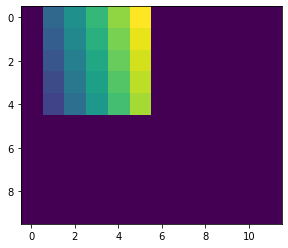

In [24]:
## Accounting for the masks that partly spill out of the original mapping 

from matplotlib import pyplot as plt

print("masked map")
plt.imshow(mapping, interpolation='nearest')
print()


control_matrix



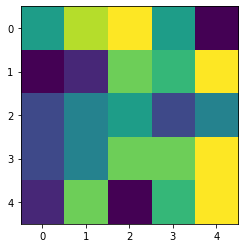

In [22]:
print("control_matrix")
plt.imshow(control, interpolation='nearest')
print()

mask



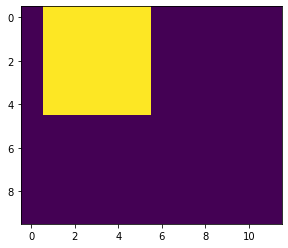

In [25]:
print("mask")
plt.imshow(mask, interpolation='nearest')
print()

control_mask



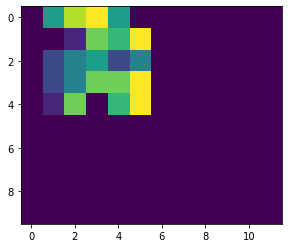

In [27]:
print("control_mask")
plt.imshow(control_mask, interpolation='nearest')
print()